Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.300870740
Epoch: 0002 cost = 0.113770540
Epoch: 0003 cost = 0.074162356
Epoch: 0004 cost = 0.052214887
Epoch: 0005 cost = 0.038613041
Epoch: 0006 cost = 0.029377270
Epoch: 0007 cost = 0.023483501
Epoch: 0008 cost = 0.020655811
Epoch: 0009 cost = 0.017339568
Epoch: 0010 cost = 0.015239236
Epoch: 0011 cost = 0.010951954
Epoch: 0012 cost = 0.010439649
Epoch: 0013 cost = 0.012589361
Epoch: 0014 cost = 0.009594380
Epoch: 0015 cost = 0.009582127
Learning Finished!
Accuracy: 0.9735
Label:  [6]
Prediction:  [6]


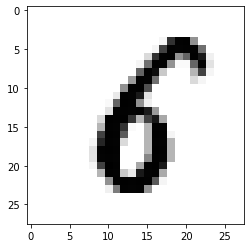

In [13]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.reset_default_graph()
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# Weight 초기화에 Xavier 사용
# Accuracy: 0.9455 (normal dist)
# Accuracy: 0.9735 (xavier)
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28), 
    cmap='Greys', 
    interpolation='nearest'
)
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.296593464
Epoch: 0002 cost = 0.106405850
Epoch: 0003 cost = 0.071373431
Epoch: 0004 cost = 0.053182929
Epoch: 0005 cost = 0.041075265
Epoch: 0006 cost = 0.035830121
Epoch: 0007 cost = 0.028180974
Epoch: 0008 cost = 0.027843757
Epoch: 0009 cost = 0.023364747
Epoch: 0010 cost = 0.023307959
Epoch: 0011 cost = 0.018298163
Epoch: 0012 cost = 0.015756048
Epoch: 0013 cost = 0.021588305
Epoch: 0014 cost = 0.017081186
Epoch: 0015 cost = 0.012491922
Learning Finished!
Accuracy: 0.9704
Label:  [3]
Prediction:  [3]


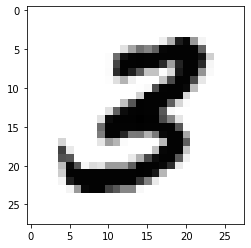

In [14]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.reset_default_graph()
tf.set_random_seed(777)

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# Weight 초기화에 Xavier 사용
# Accuracy: 0.9455 (normal dist)
# Accuracy: 0.9735 (xavier)
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28), 
    cmap='Greys', 
    interpolation='nearest'
)
plt.show()